# Conhecendo as Funções de Ativação

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

## Apresentação

No contexto das redes neurais artificiais, as funções de ativação representam as transformações aplicadas às entradas do neurônio sujeitas aos respectivos graus de contribuição (pesos) para decidir se este neurônio deve ou não disparar. Ao considerar as redes neurais feedforward multilayer perceptron, tais funções de ativação devem ser contínuas e deriváveis, sendo responsáveis por realizarem transformações não-lineares sucessivas da informação fornecida na camada de entrada até a camada de saída, fazendo com que o problema vá tornando-se linearmente separável à medida que adentra-se na rede.

Neste notebook, o seu objetivo é conhecer melhor as funções de ativação disponíveis na literatura e suas respectivas derivadas. Você irá construir gráficos que ilustrem tais funções.

## Requisitos

- Utilizar numpy
- Plotar com matplotlib

In [1]:
# Célula reservada para importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

## Intervalo de Entrada

- Todas as funções devem ser ilustradas no intervalo [-4,+4] com amostras intervaladas em 0.1 no eixo x
- Consulte a documentação de numpy.arange sobre como fazê-lo
- https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange
- Quantas amostras há em tal espaço de entrada?
- Qual o tipo deste dado?
- Qual a forma do espaço de entrada?

In [2]:
amostras = np.arange(-4,4,0.1)
print(amostras)

[-4.00000000e+00 -3.90000000e+00 -3.80000000e+00 -3.70000000e+00
 -3.60000000e+00 -3.50000000e+00 -3.40000000e+00 -3.30000000e+00
 -3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00
 -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00
 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00
 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  3.55271368e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
  2.00000000e+00  2.10000

In [3]:
print("Tipo de dado: {}".format(amostras.dtype))

Tipo de dado: float64


In [4]:
print("Quantidade de amostras: {}".format(amostras.shape[0]))

Quantidade de amostras: 80


### Função de ativação sigmoide

$$f(x) = \frac{1}{1 + e^{-\beta \cdot x}}$$

- Implemente uma função em Python que retorne o valor da função sigmóide para uma dada entrada
- Nesta função, considere beta como parâmetro nomeado com valor igual a 1.0
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função sigmoide
- Em um mesmo gráfico, ilustre 3 valores distintos para $\beta$:
  - $\beta = 0.7$ na cor laranja
  - $\beta = 0.5$ na cor verde
  - $\beta = 0.3$ na cor vermelha
  - Use legendas no gráfico

In [5]:
def sigmoid(x,b):
    return 1 / (1 + np.exp(-b*x)), x

def derivada_funcao_sigmoide(x):
    return x * (1 - x)

In [6]:
x_sigmoid, x = sigmoid(amostras, 1.0)
a_sigmoid, a = sigmoid(amostras,0.7)
b_sigmoid, b = sigmoid(amostras,0.5)
c_sigmoid, c = sigmoid(amostras,0.3)

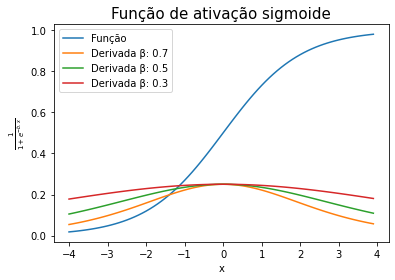

In [7]:
plt.plot(x, x_sigmoid, label="Função")
plt.plot(a, derivada_funcao_sigmoide(a_sigmoid), label = "Derivada \u03B2: 0.7")
plt.plot(b, derivada_funcao_sigmoide(b_sigmoid), label = "Derivada \u03B2: 0.5")
plt.plot(c, derivada_funcao_sigmoide(c_sigmoid), label = "Derivada \u03B2: 0.3")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel(r"$\frac{1}{1 + e^{-b.x}}$")
plt.title("Função de ativação sigmoide", fontsize=15)
plt.show()

### Função de Ativação ReLU (Unidade Linear Retificada)

$$f(x) = max(0,x)$$

- Implemente uma função em Python que retorne o valor da função ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função ReLU

In [8]:
def relu(x):
    return np.maximum(0, x), x

def derivada_relu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

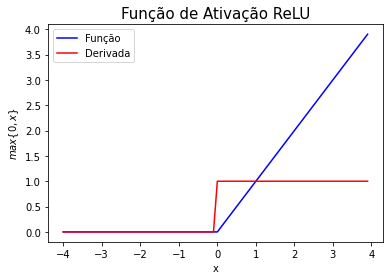

In [9]:
r_relu, x = relu(amostras)
plt.plot(x, r_relu, 'b', label="Função")
plt.plot(x, derivada_relu(r_relu), 'r', label="Derivada")

plt.xlabel("x")
plt.ylabel(r"$max\{0, x\}$")
plt.legend(loc="upper left")

plt.title("Função de Ativação ReLU", fontsize=15)
plt.show()

### Função de ativação linear (purelin)

$$f(x) = x$$

- Implemente uma função em Python que retorne o valor da função linear para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão

### Função de ativação Tangente Hiperbólica

$$f(x) = tanh(x)$$

- Implemente uma função em Python que retorne o valor da função tangente hiperbólica para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão
- Utilize bibliotecas para auxiliar nesta tarefa
- Considere o intervalo (-1,1)

In [10]:
def tanh(x):
    return np.tanh(x), x

def derivada_tanh(r_tanh):
    return 1 - np.square(r_tanh)

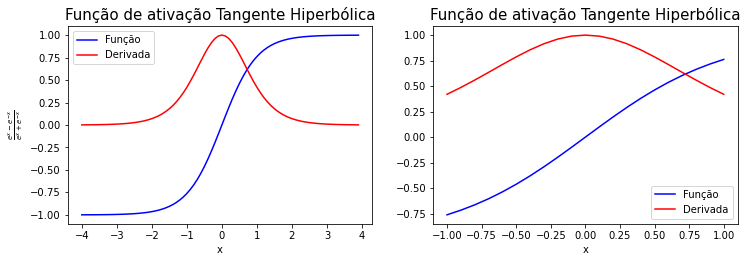

In [11]:
plt.figure(figsize=(12, 8))

# Intervalo [-4.0, 4.0]
r_tanh, x = tanh(amostras)
plt.subplot(2, 2, 1)
plt.plot(x, r_tanh, 'b', label = "Função")
plt.plot(x, derivada_tanh(r_tanh), 'r',label="Derivada") 
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel(r"$\frac{e^x - e^{-x}}{e^x + e^{-x}}$")
plt.title("Função de ativação Tangente Hiperbólica", fontsize=15)

# Intervalo [-1.0, 1.0]
r_interval = amostras[(amostras>=-1.0) & (amostras<1.1)]
plt.subplot(2, 2, 2)
r2_tanh, x2 = tanh(r_interval)
plt.plot(x2, r2_tanh, 'b', label = "Função")
plt.plot(x2, derivada_tanh(r2_tanh), 'r',label="Derivada")
plt.legend(loc="lower right")
plt.xlabel("x")
plt.title("Função de ativação Tangente Hiperbólica", fontsize=15)

plt.show()

### Função de Ativação Gaussiana

$$f(x) = \exp \left( \frac{-(x - \mu)^2}{2\sigma^2} \right)$$

- $\mu$ é o ponto médio (centro) da curva
- $\sigma$ denota o raio de abertura
- Implemente uma função em Python que retorne o valor da função gaussiana para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão


Considere também os seguintes valores ao plotar a função

- Parâmetros nomeados $\mu = 0$ e $\sigma = 1$
- $\mu = 0, \sigma = 0.3$
- $\mu = 0, \sigma = 0.5$
- $\mu = 0, \sigma = 0.7$
- $\mu = 0, \sigma = 0.9$
- $\mu = 0, \sigma = 1.1$

In [12]:
def gaussiana(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

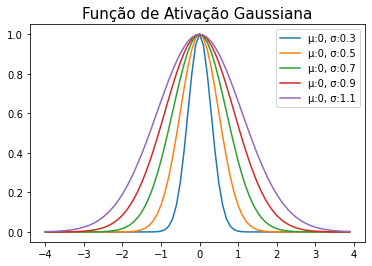

In [13]:
for mu, sig in [(0, 0.3), (0, 0.5), (0, 0.7), (0, 0.9), (0, 1.1)]:
    plt.plot(amostras, gaussiana(amostras, mu, sig), label = "\u03BC:{}, \u03C3:{}".format(mu, sig))
plt.legend(loc="upper right")
plt.title("Função de Ativação Gaussiana", fontsize=15)
plt.show()

### Função de Ativação Leaky ReLU

$$f(x) = \left\{\begin{array}{cc} 0.01\cdot x & x < 0\\
x & x \geq 0
\end{array}
\right.$$

- Implemente uma função em Python que retorne o valor da função Leaky ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função Leaky ReLU

In [14]:
def leaky_relu(x):
    return np.maximum(0.1 * x, x), x

def derivada_leaky_relu(x):
    dx = np.ones_like(x)
    dx[x < 0] = 0.01
    return dx, x

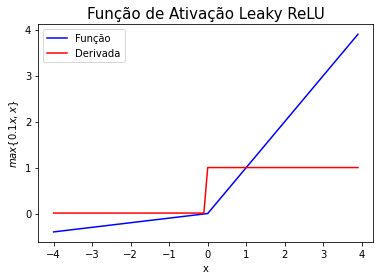

In [15]:
r_leaky_relu, x = leaky_relu(amostras)
r_derivada_leaky_relu, dx = derivada_leaky_relu(amostras)
plt.plot(x, r_leaky_relu, 'b', label="Função")
plt.plot(dx, r_derivada_leaky_relu, 'r', label="Derivada")

plt.xlabel("x")
plt.legend(loc="upper left")
plt.ylabel(r"$max\{0.1x, x\}$")
plt.title("Função de Ativação Leaky ReLU", fontsize=15)
plt.show()